# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Siti Nurbayanah
- **Email:** sitinurbayanah24@gmail.com
- **ID Dicoding:** MC222D5X1273

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan PM2.5 dan PM10 sepanjang waktu?
- Bagaimana distribusi polusi udara di berbagai lokasi?
- Bagaimana perbedaan kualitas udara antara pagi, siang, dan malam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

## Data Wrangling

### Gathering Data

In [2]:
csv_files = glob.glob("data/**/*.csv", recursive=True)

df_list = []

for file in csv_files:
    df = pd.read_csv(file)
    df["source_file"] = os.path.basename(file)
    df_list.append(df)
    
    print(f"\n===== Head dari file: {os.path.basename(file)} =====")
    print(df.head())


===== Head dari file: PRSA_Data_Aotizhongxin_20130301-20170228.csv =====
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  \
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin   
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin   
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin   
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin   
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin   

                                    source_file  
0  PRSA_Data_Aotizhongxin_20130301-20170228.csv  
1  PRSA_Data_Aotizhongxin_20130301-20170228.csv  
2  PRSA_Data

**Insight:**
- **Kolom-kolom dalam dataset Air Quality memiliki arti sebagai berikut:**
- No – Nomor urut atau indeks dari setiap baris dalam dataset.
- year – Tahun pengukuran kualitas udara.
- month – Bulan pengukuran kualitas udara.
- day – Hari pengukuran kualitas udara.
- hour – Jam pengukuran kualitas udara (biasanya dalam format 24 jam).
- PM2.5 – Konsentrasi partikel halus dengan diameter ≤ 2.5 µm (mikrometer), yang berbahaya bagi kesehatan karena dapat masuk ke paru-paru dan aliran darah.
- PM10 – Konsentrasi partikel yang lebih besar, dengan diameter ≤ 10 µm, yang juga dapat menyebabkan gangguan pernapasan.
- SO2 – Konsentrasi Sulfur Dioksida (SO₂), gas polutan yang berasal dari pembakaran bahan bakar fosil dan industri.
- NO2 – Konsentrasi Nitrogen Dioksida (NO₂), gas yang berasal dari kendaraan bermotor dan industri, yang dapat menyebabkan masalah pernapasan.
- CO – Konsentrasi Karbon Monoksida (CO), gas beracun yang dihasilkan dari pembakaran tidak sempurna.
- O3 – Konsentrasi Ozon (O₃), yang dapat berdampak negatif pada sistem pernapasan jika berada di permukaan bumi.
- TEMP – Suhu udara pada saat pengukuran (biasanya dalam derajat Celsius).
- PRES – Tekanan udara pada saat pengukuran (biasanya dalam hPa atau milibar).
- DEWP – Dew Point (Titik Embun), yaitu suhu di mana udara mencapai kejenuhan dan mulai membentuk embun.
- RAIN – Jumlah curah hujan yang tercatat pada saat pengukuran.
- wd – Wind Direction (Arah Angin), biasanya dalam bentuk arah mata angin (N, NE, E, dll.).
- WSPM – Wind Speed (Kecepatan Angin), biasanya dalam meter per detik (m/s).
station – Lokasi atau stasiun pengukuran kualitas udara.

### Assessing Data

In [3]:
for file in csv_files:
    df = pd.read_csv(file)
    
    print(f"\n===== Info dari file: {os.path.basename(file)} =====")
    print(f"\n---------------Informasi Table----------------------")
    print(df.info())
    print(f"\n----------Jumlah Baris Dengan Value Null------------")
    print(df.isna().sum())
    print(f"\n----------------Jumlah Duplikasi--------------------")
    print("Jumlah duplikasi: ", df.duplicated().sum())
    print(f"\n---------------Deskripsi Table----------------------")
    print(df.describe())


===== Info dari file: PRSA_Data_Aotizhongxin_20130301-20170228.csv =====

---------------Informasi Table----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dty

**Insight:**
- Semua data type sudah sesuai dengan dataset yang diberikan.
- Value Null terdapat di kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WD, dan WSPM.
- Kolom dapat dibagi menjadi 3 bagian yaitu
1. Kolom yang tidak boleh Null (No, Year, Month, Hour, Station, TEMP, PRES), alasan: penting untuk identifikasi data atau perhitungan utama.
2. Kolom yang sebaiknya tidak Null (PM2.5, PM10, SO2, NO2, CO, O3), alasan: Indikator kualitas udara yang jika null menyebabkan bias analisis.
3. Kolom yang bisa Null (RAIN, DEWP, wd, WSPM), alasan: data memiliki keadaan yang memungkinkan nilai null.
- Dari kategori tersebut, data yang perlu dilakukan cleaning adalah: **PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES**
- Tidak terdapat duplikasi pada table manapun.
- Berdasarkan https://www.climate4life.info/2021/03/regulasi-terbaru-perhitungan-ispu.html terdapat innacurate value pada kolom PM2.5 dan PM10 yang mana maksimum di dataset: PM2.5 = 680 µg/m³, PM10 = 999 µg/m³ sedangkan berdasarkan tabel ISPU, batas maksimum: PM2.5 = 500 µg/m³, PM10 = 500 µg/m³.

### Cleaning Data

In [4]:
cleaned_folder = "dashboard"
os.makedirs(cleaned_folder, exist_ok=True)
selected_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES"]
csv_files = glob.glob("data/**/*.csv", recursive=True)

limits = {
    "PM2.5": 500,
    "PM10": 500,
    "SO2": 1200,
    "NO2": 3000,
    "CO": 45000,
    "O3": 1000
}

cleaned_dfs = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
    except pd.errors.EmptyDataError:
        print(f"File kosong dilewati: {file}")
        continue
    except Exception as e:
        print(f"Error membaca file {file}: {e}")
        continue
    
    required_columns = {'year', 'month', 'day', 'hour'}
    if not required_columns.issubset(df.columns):
        print(f"Kolom tidak lengkap di file {file}, dilewati.")
        continue
    
    df["datetime"] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], errors='coerce')
    df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

    available_columns = [col for col in selected_columns if col in df.columns]
    if not available_columns:
        print(f"Tidak ada kolom yang sesuai dalam file: {file}")
        continue

    for col in ["TEMP", "PRES", "PM2.5", "PM10", "SO2"]:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    for col in ["CO", "NO2", "O3"]:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    if "WD" in df.columns and not df["WD"].isna().all():
        mode_value = df["WD"].mode()
        if not mode_value.empty:
            df["WD"] = df["WD"].fillna(mode_value[0])

    for col, max_val in limits.items():
        if col in df.columns:
            df[col] = df[col].apply(lambda x: max_val if x > max_val else (0 if x < 0 else x))

    if df.empty:
        print(f"Data kosong setelah cleaning, dilewati: {file}")
        continue
    
    cleaned_dfs.append(df)

if cleaned_dfs:
    main_data = pd.concat(cleaned_dfs, ignore_index=True)
    output_path = os.path.join(cleaned_folder, "main_data.csv")
    main_data.to_csv(output_path, index=False)

    print(f"Semua data hasil cleaning telah digabungkan dalam: {output_path}")
    print("\n===== Info dari file: main_data.csv =====")
    print("\n---------------Informasi Table----------------------")
    print(main_data.info())
    print("\n----------Jumlah Baris Dengan Value Null------------")
    print(main_data.isna().sum())
    print("\n----------------Jumlah Duplikasi--------------------")
    print("Jumlah duplikasi: ", main_data.duplicated().sum())
    print("\n---------------Deskripsi Table----------------------")
    print(main_data.describe())
else:
    print("Tidak ada file yang berhasil dibersihkan.")


Semua data hasil cleaning telah digabungkan dalam: dashboard\main_data.csv

===== Info dari file: main_data.csv =====

---------------Informasi Table----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   PM2.5     420768 non-null  float64       
 2   PM10      420768 non-null  float64       
 3   SO2       420768 non-null  float64       
 4   NO2       420768 non-null  float64       
 5   CO        420768 non-null  float64       
 6   O3        420768 non-null  float64       
 7   TEMP      420768 non-null  float64       
 8   PRES      420768 non-null  float64       
 9   DEWP      420365 non-null  float64       
 10  RAIN      420378 non-null  float64       
 11  wd        418946 non-null  object        
 12  WSPM      420450 non-null  float64       
 13  station

**Insight:**
- Terdapat beberapa perubahan untuk data hasil cleaning, yaitu merge 4 kolom (hour, day, month, dan year) untuk memudahkan visualisasi menajdi datetime.
- Semua kolom sudah tidak memiliki missing values, kecuali beberapa kolom yang diperbolehkan memiliki nilai null.
- Data yang memiliki innacurate value seperti PM2.5 dan PM10 sudah sesuai dengan ketentuan yang berlaku.

## Exploratory Data Analysis (EDA)

### Explore Parameter Statistik dari Data 

In [5]:
main_data.describe(include="all")

No          PM2.5           PM10            SO2  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000      79.107851     103.732334      15.642997   
min          1.000000       2.000000       2.000000       0.285600   
25%       8766.750000      21.000000      36.000000       3.000000   
50%      17532.500000      55.000000      82.000000       7.000000   
75%      26298.250000     109.000000     144.000000      19.000000   
max      35064.000000     500.000000     500.000000     500.000000   
std      10122.116943      79.047560      88.320928      21.456742   

                  NO2            CO             O3           TEMP  \
count   420768.000000  420768.00000  420768.000000  420768.000000   
unique            NaN           NaN            NaN            NaN   
top               NaN           NaN            NaN            NaN   
freq              NaN           NaN            NaN            NaN   
mean        50.583319    1230.62509      57.346692      13.539869   
min          1.026500     100.00000       0.214200     -19.900000   
25%         24.000000     500.00000      12.000000       3.100000   
50%         44.000000     900.00000      47.000000      14.500000   
75%         70.000000    1500.00000      80.000000      23.200000   
max        290.000000   10000.00000    1000.000000      41.600000   
std         34.677400    1131.69545      55.722862      11.430772   

                 PRES           DEWP           RAIN      wd           WSPM  \
count   420768.000000  420365.000000  420378.000000  418946  420450.000000   
unique            NaN            NaN            NaN      16            NaN   
top               NaN            NaN            NaN      NE            NaN   
freq              NaN            NaN            NaN   43335            NaN   
mean      1010.746005       2.490822       0.064476     NaN       1.729711   
min        982.400000     -43.400000       0.000000     NaN       0.000000   
25%       1002.300000      -8.900000       0.000000     NaN       0.900000   
50%       1010.400000       3.100000       0.000000     NaN       1.400000   
75%       1019.000000      15.100000       0.000000     NaN       2.200000   
max       1042.800000      29.100000      72.500000     NaN      13.200000   
std         10.469428      13.793847       0.821004     NaN       1.246386   

             station                       datetime  
count         420768                         420768  
unique            12                            NaN  
top     Aotizhongxin                            NaN  
freq           35064                            NaN  
mean             NaN  2015-03-01 11:30:00.000001024  
min              NaN            2013-03-01 00:00:00  
25%              NaN            2014-03-01 05:45:00  
50%              NaN            2015-03-01 11:30:00  
75%              NaN            2016-02-29 17:15:00  
max              NaN            2017-02-28 23:00:00  
std              NaN                            NaN

In [6]:
# Cek statistik data hasil cleaning

print("=== Statistik Deskriptif ===")
print(main_data.describe(include="all"))

numeric_data = main_data.select_dtypes(include=["number"])

print("\n=== Skewness (Kemiringan Distribusi) ===")
print(numeric_data.skew())

print("\n=== Kurtosis (Keruncingan Distribusi) ===")
print(numeric_data.kurtosis())

print("\n=== Missing Values ===")
print(main_data.isna().sum())

print("\n=== Outlier berdasarkan IQR ===")
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print(outliers)


=== Statistik Deskriptif ===
                   No          PM2.5           PM10            SO2  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000      79.107851     103.732334      15.642997   
min          1.000000       2.000000       2.000000       0.285600   
25%       8766.750000      21.000000      36.000000       3.000000   
50%      17532.500000      55.000000      82.000000       7.000000   
75%      26298.250000     109.000000     144.000000      19.000000   
max      35064.000000     500.000000     500.000000     500.000000   
std      10122.116943      79.047560      88.320928      21.456742   

                  NO2            CO             O3           TEMP  \
count   420768.000000  420768.00000  420768.000000  420768.00

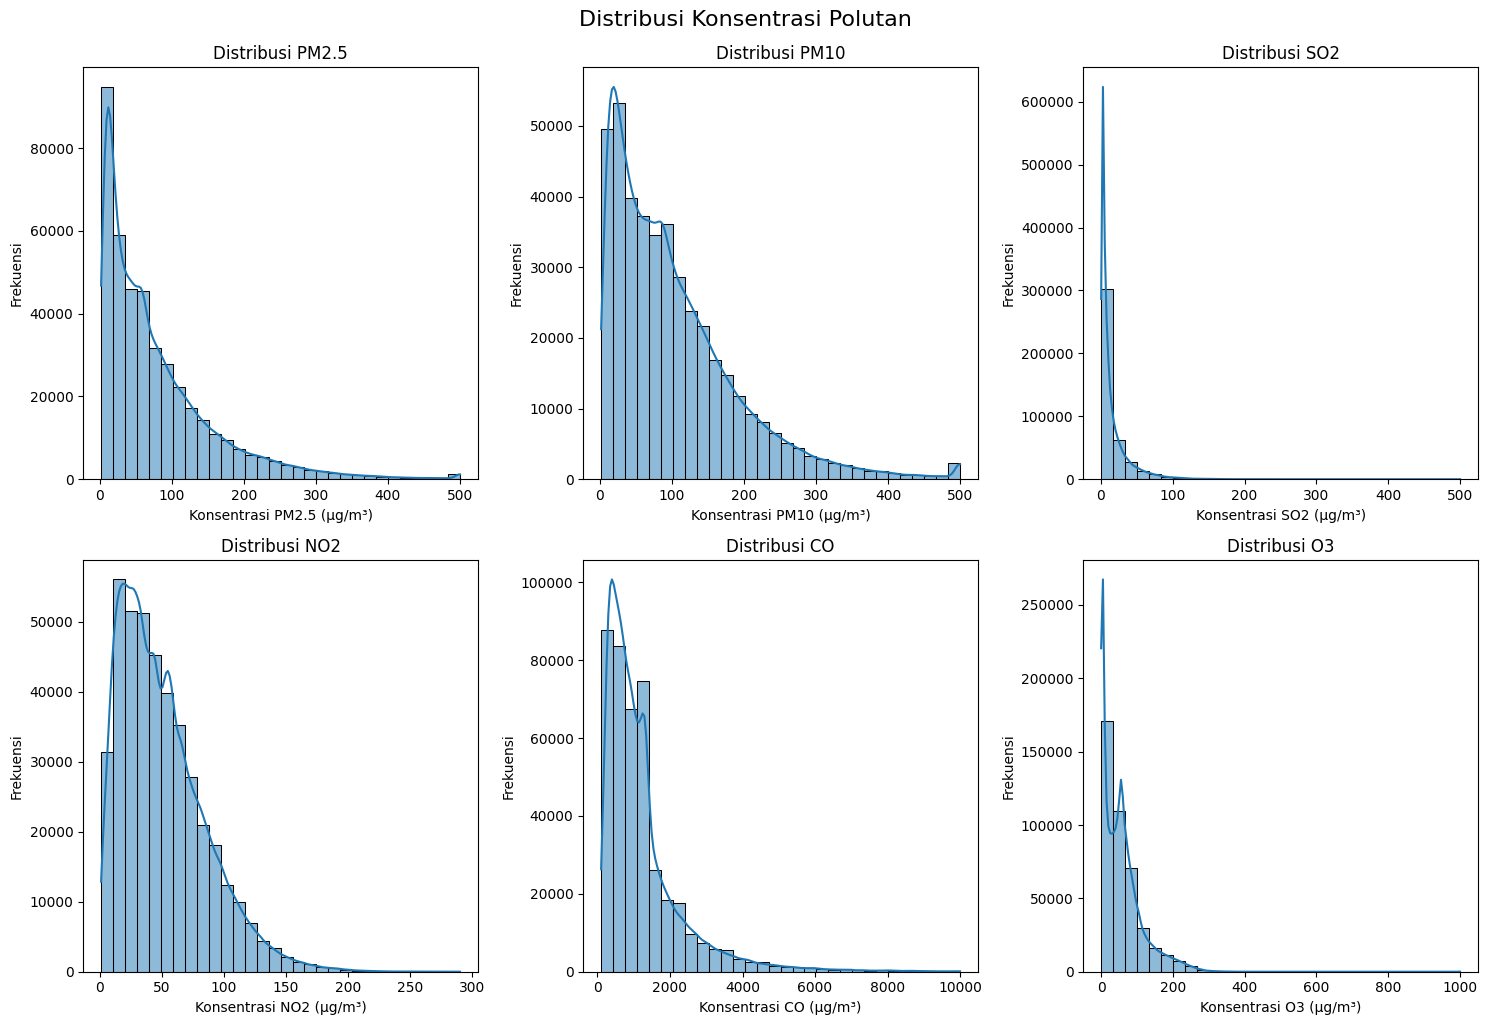

In [7]:
main_data["datetime"] = pd.to_datetime(main_data["datetime"])
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(main_data[pollutant], bins=30, kde=True)
    plt.title(f"Distribusi {pollutant}")
    plt.xlabel(f"Konsentrasi {pollutant} (µg/m³)")
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.suptitle("Distribusi Konsentrasi Polutan", y=1.02, fontsize=16)
plt.show()

### Explore distribusi polusi udara di berbagai lokasi

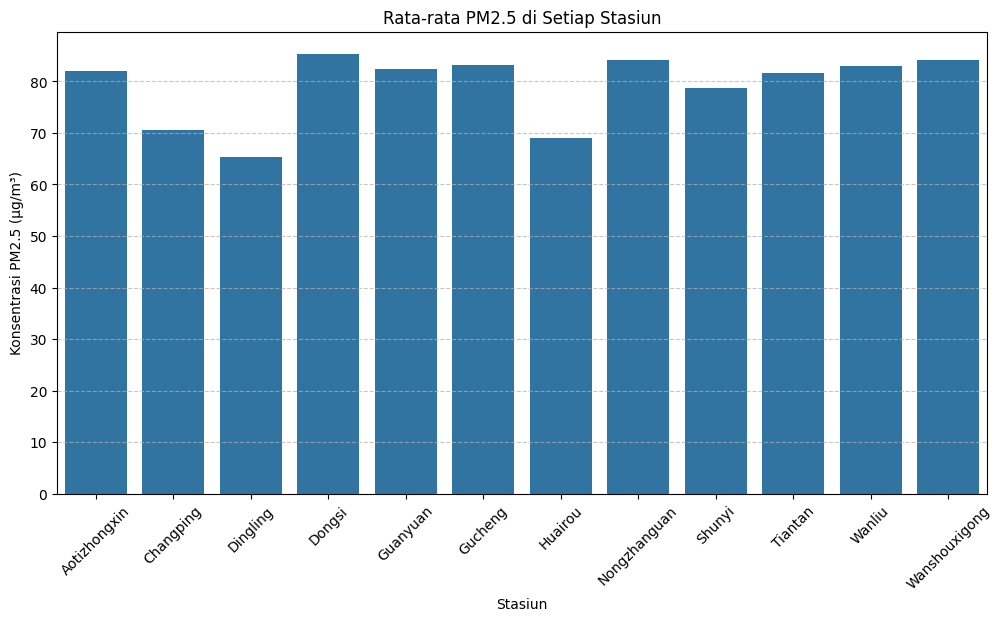

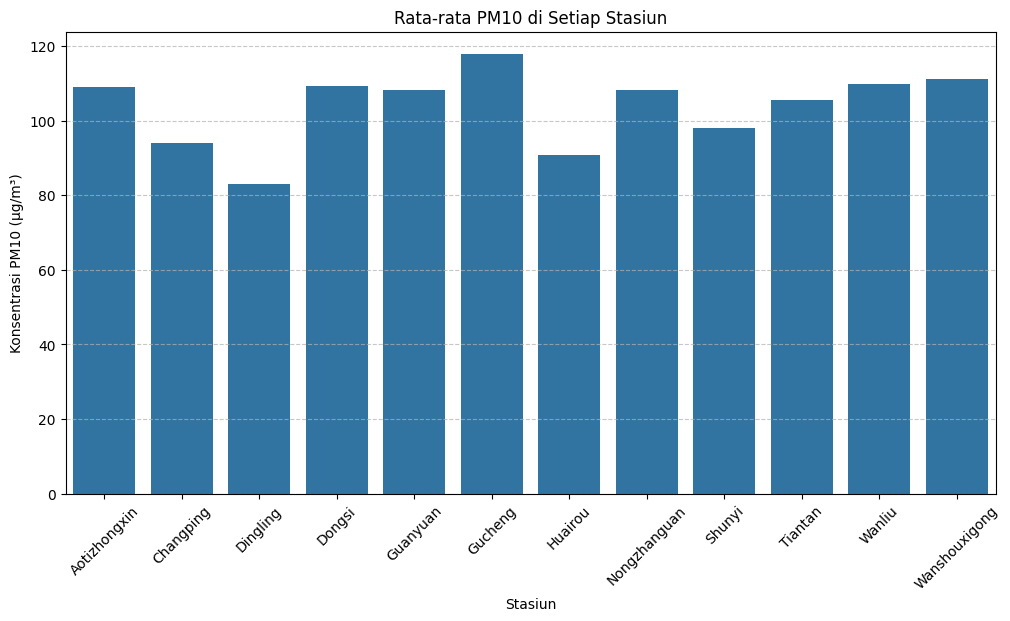

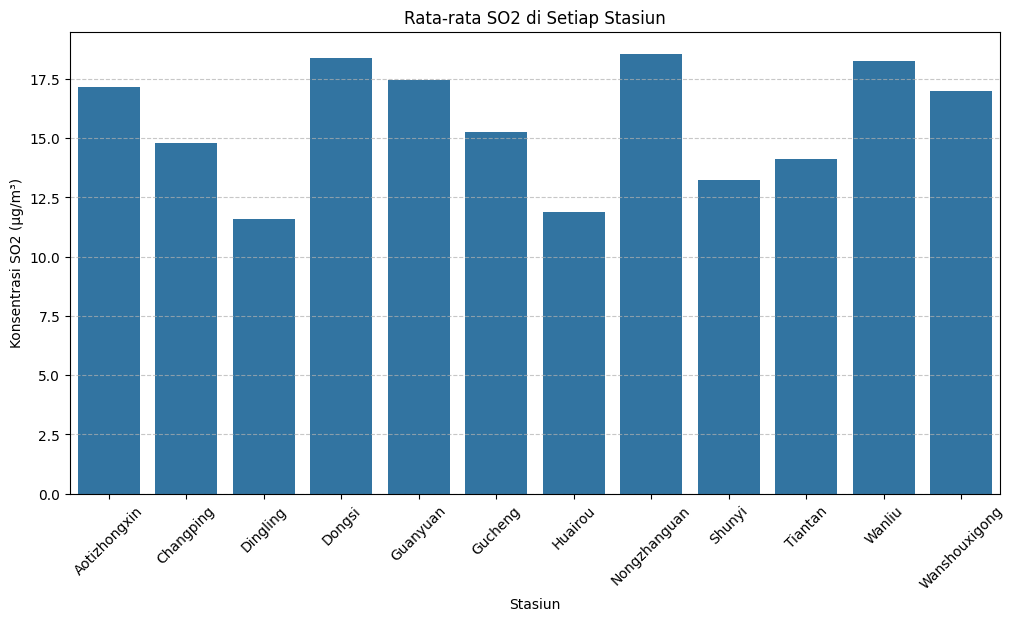

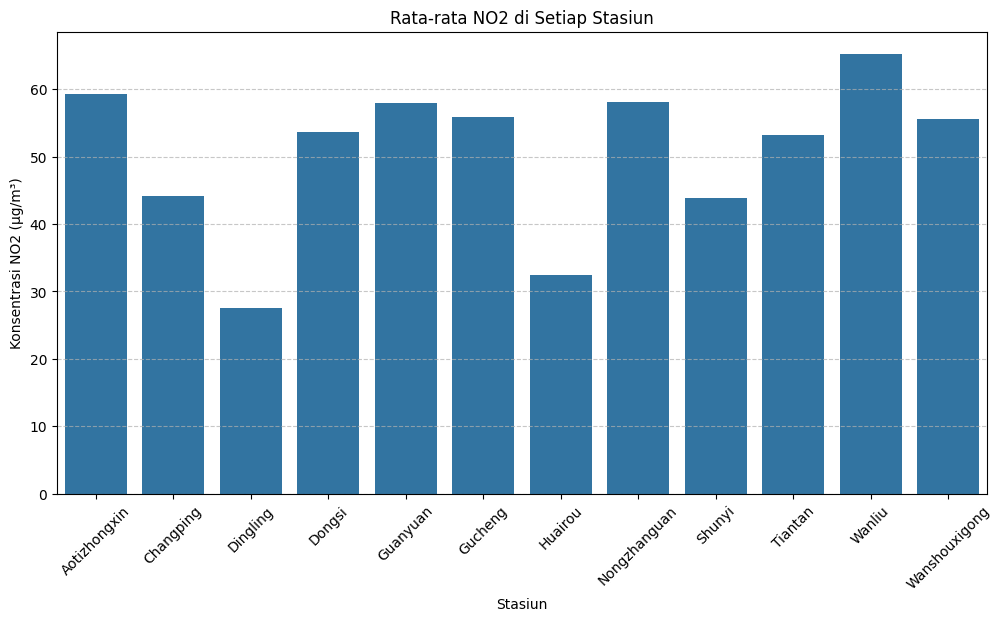

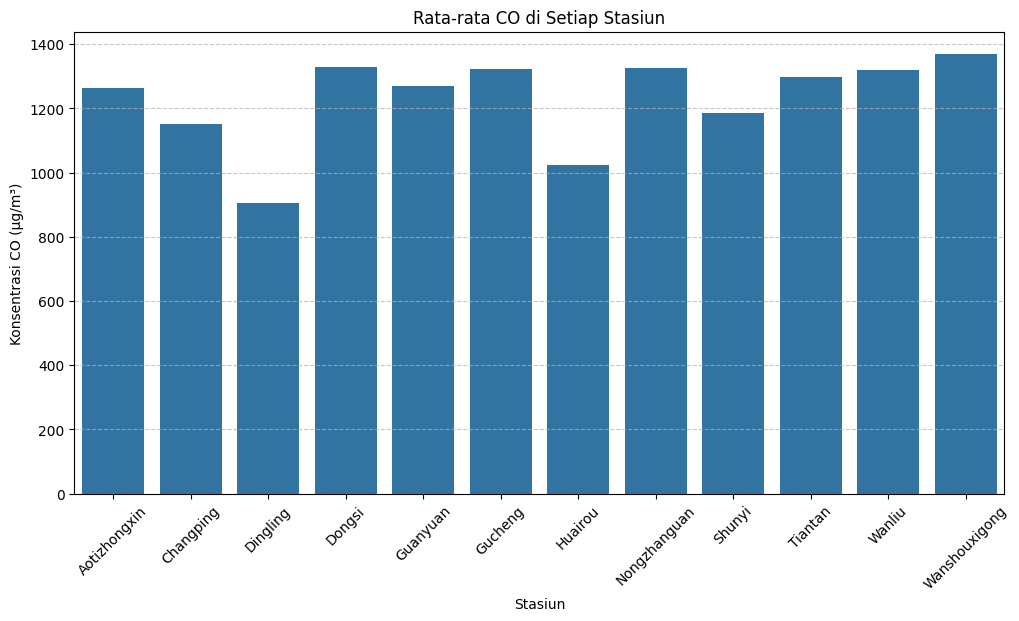

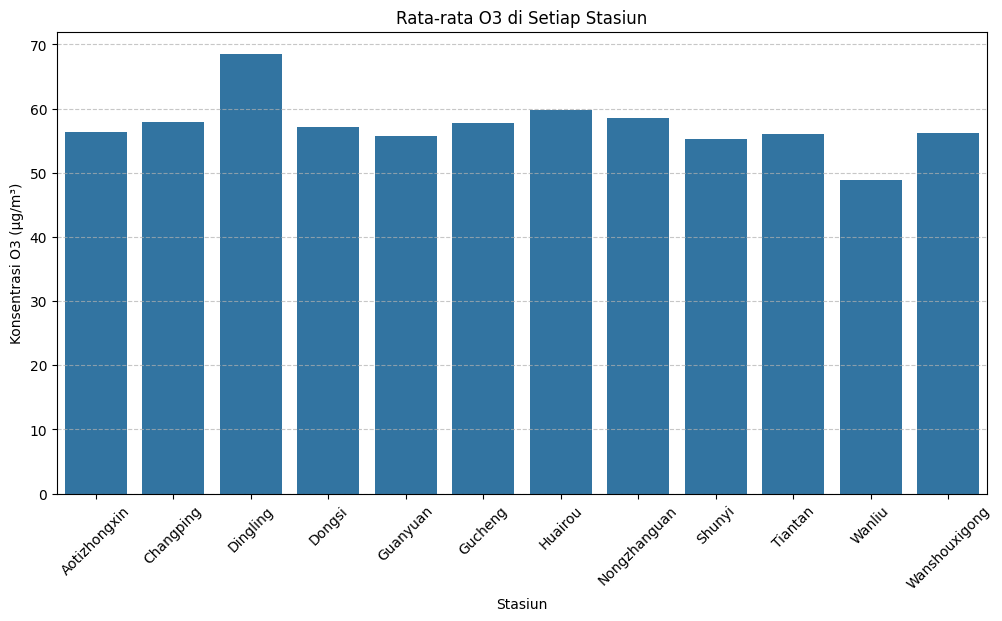

In [8]:
main_data["datetime"] = pd.to_datetime(main_data["datetime"])
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
stations = main_data["station"].unique()
bar_color = "#1f77b4"

for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    station_avg = main_data.groupby("station")[pollutant].mean().reset_index()
    sns.barplot(data=station_avg, x="station", y=pollutant, color=bar_color)
    
    plt.title(f"Rata-rata {pollutant} di Setiap Stasiun")
    plt.xlabel("Stasiun")
    plt.ylabel(f"Konsentrasi {pollutant} (µg/m³)")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    plt.show()


### Explore rata-rata kualitas udara antara pagi, siang, dan malam di setiap lokasi

In [9]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Pagi"
    elif 12 <= hour < 18:
        return "Siang"
    else:
        return "Malam"

df["Kategori_Waktu"] = df["datetime"].dt.hour.apply(categorize_time)


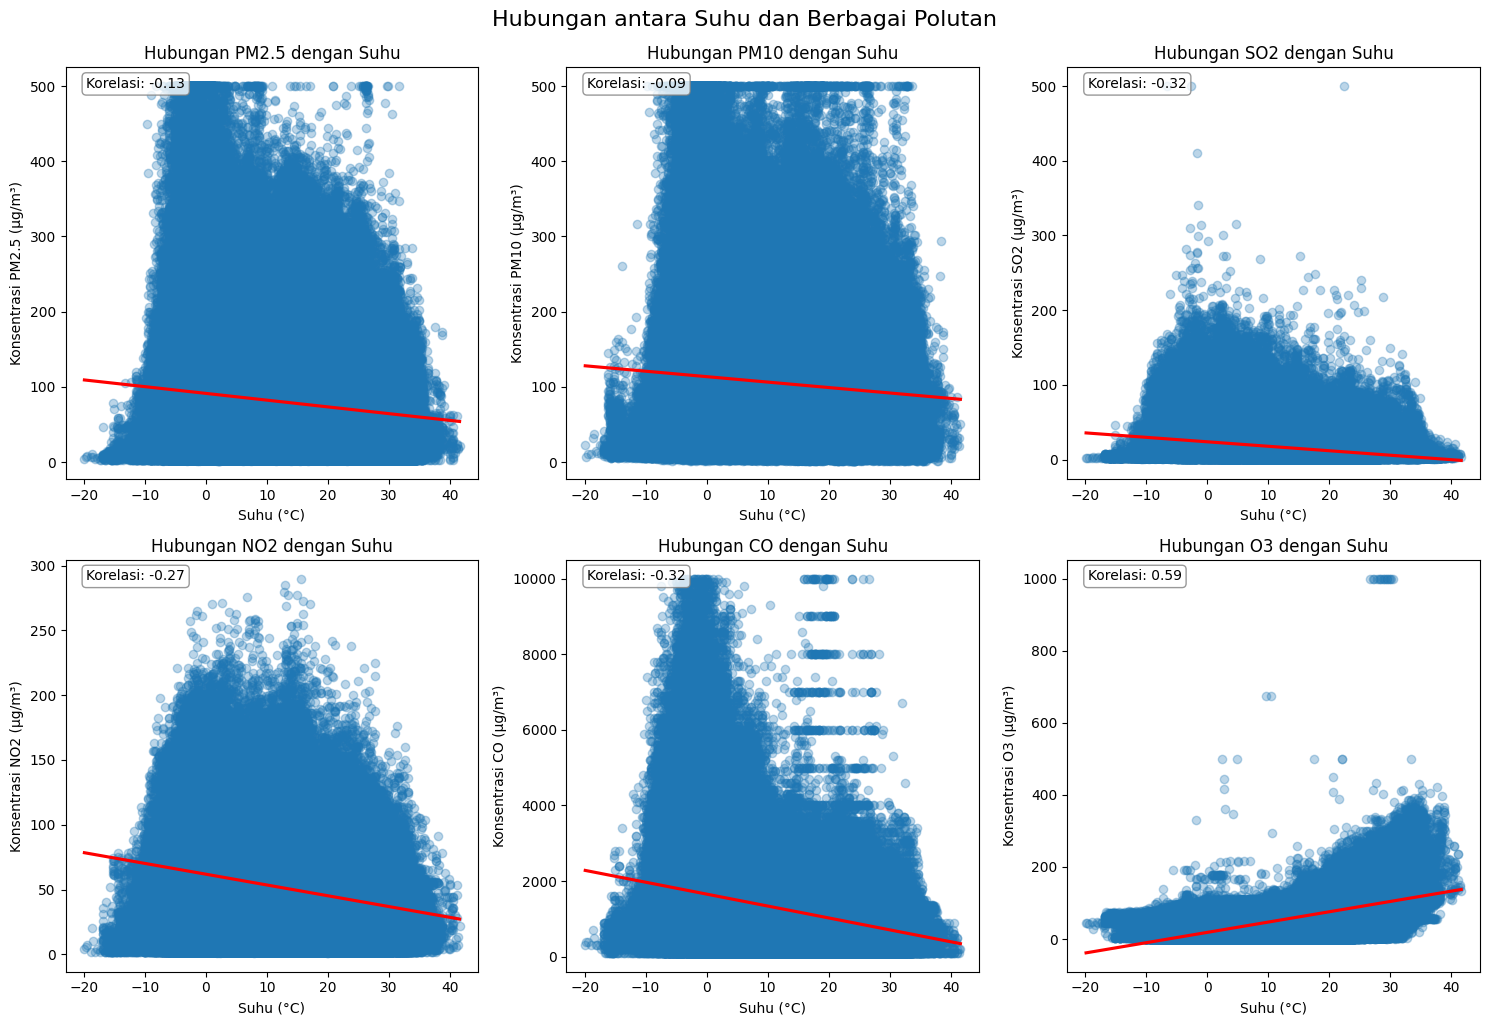

In [10]:
file_path = os.path.join("dashboard", "main_data.csv")
main_data = pd.read_csv(file_path)

main_data["datetime"] = pd.to_datetime(main_data["datetime"])

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

plt.figure(figsize=(15, 10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.regplot(data=main_data, x="TEMP", y=pollutant, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
    plt.title(f"Hubungan {pollutant} dengan Suhu")
    plt.xlabel("Suhu (°C)")
    plt.ylabel(f"Konsentrasi {pollutant} (µg/m³)")
    
    correlation = main_data[["TEMP", pollutant]].corr().iloc[0,1]
    plt.annotate(f"Korelasi: {correlation:.2f}", 
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.suptitle("Hubungan antara Suhu dan Berbagai Polutan", y=1.02, fontsize=16)
plt.show()

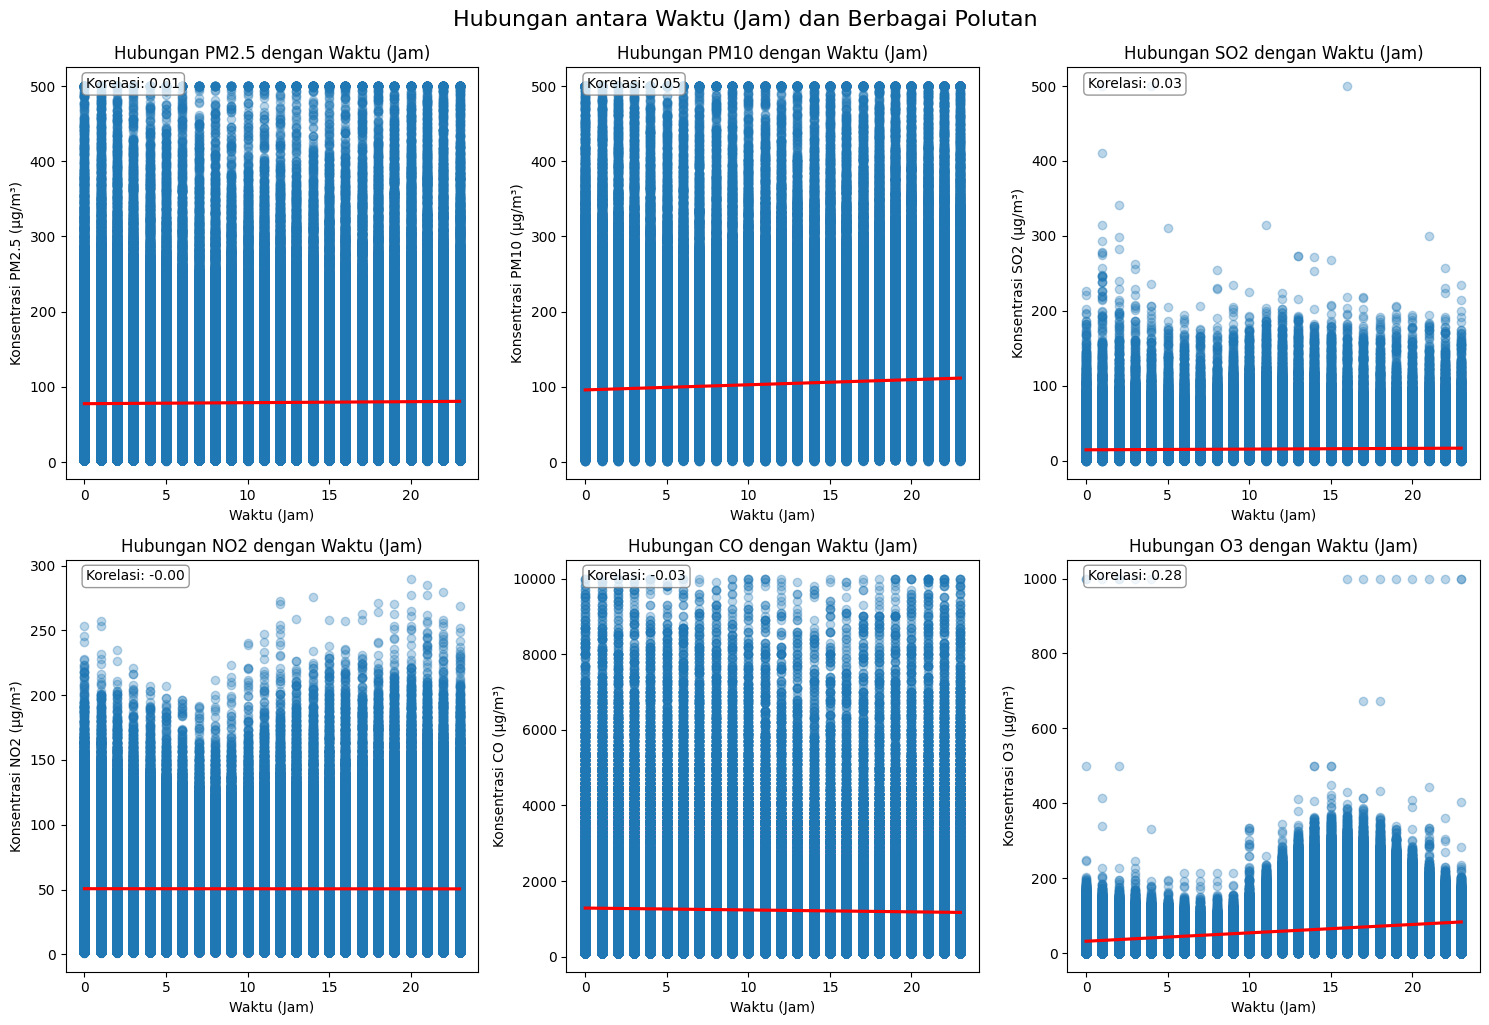

In [11]:
file_path = os.path.join("dashboard", "main_data.csv")
main_data = pd.read_csv(file_path)

main_data["datetime"] = pd.to_datetime(main_data["datetime"])

main_data["hour"] = main_data["datetime"].dt.hour

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

plt.figure(figsize=(15, 10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i) 
    sns.regplot(data=main_data, x="hour", y=pollutant, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
    plt.title(f"Hubungan {pollutant} dengan Waktu (Jam)")
    plt.xlabel("Waktu (Jam)")
    plt.ylabel(f"Konsentrasi {pollutant} (µg/m³)")
    
    correlation = main_data[["hour", pollutant]].corr().iloc[0,1]
    plt.annotate(f"Korelasi: {correlation:.2f}", 
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.suptitle("Hubungan antara Waktu (Jam) dan Berbagai Polutan", y=1.02, fontsize=16)
plt.show()

**Insight:**
- Sudah tidak ada masalah berarti di main_data.
- Sebagian besar data memiliki distribusi yang miring ke kanan (right-skewed).
- Pola rata-rata polutan di setiap statiun berbeda-beda.
- Korelasi antara waktu(jam) dengan polutan lebih besar daripada korelasi suhu dengan polutan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola perubahan polutan sepanjang waktu?

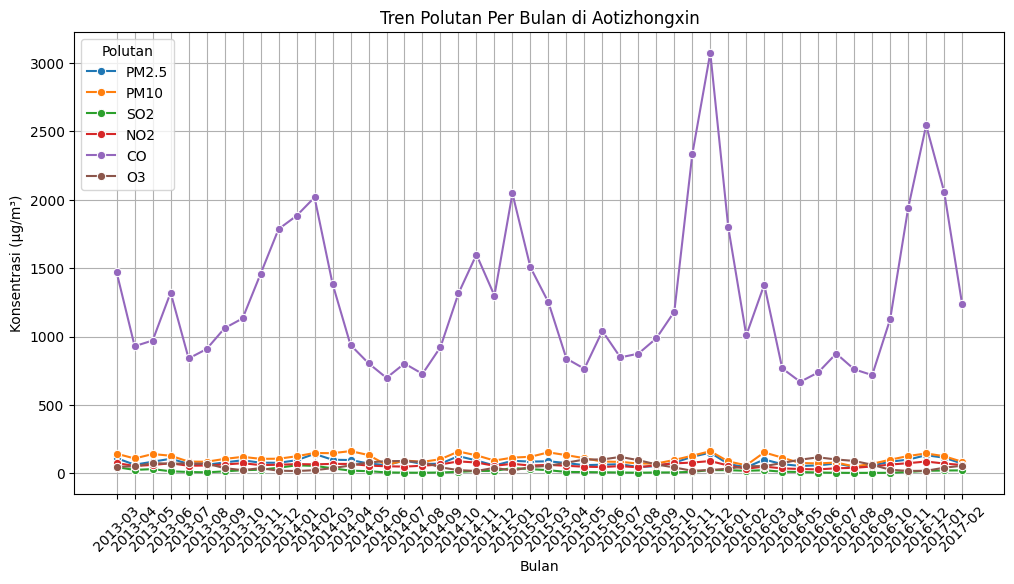

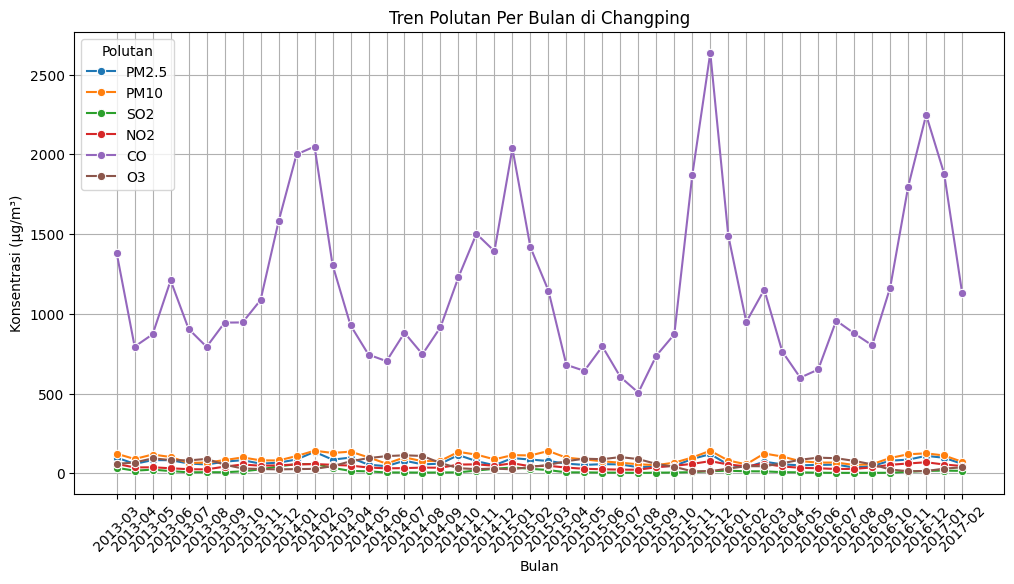

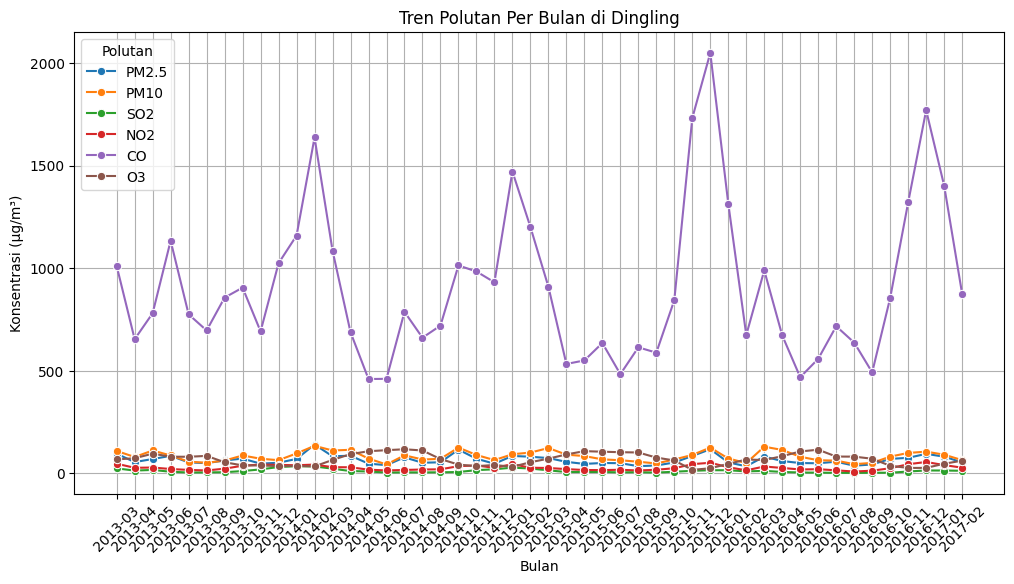

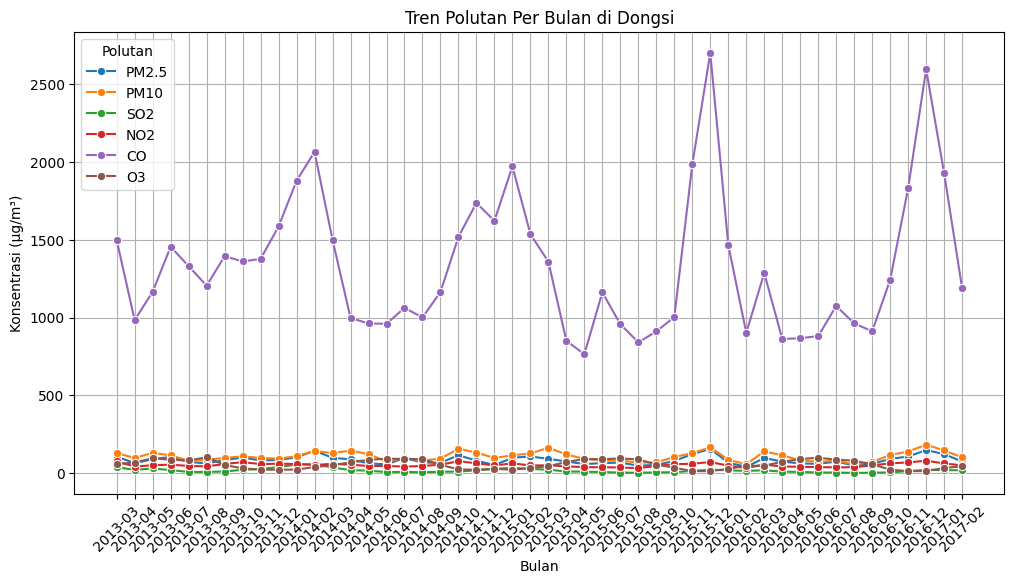

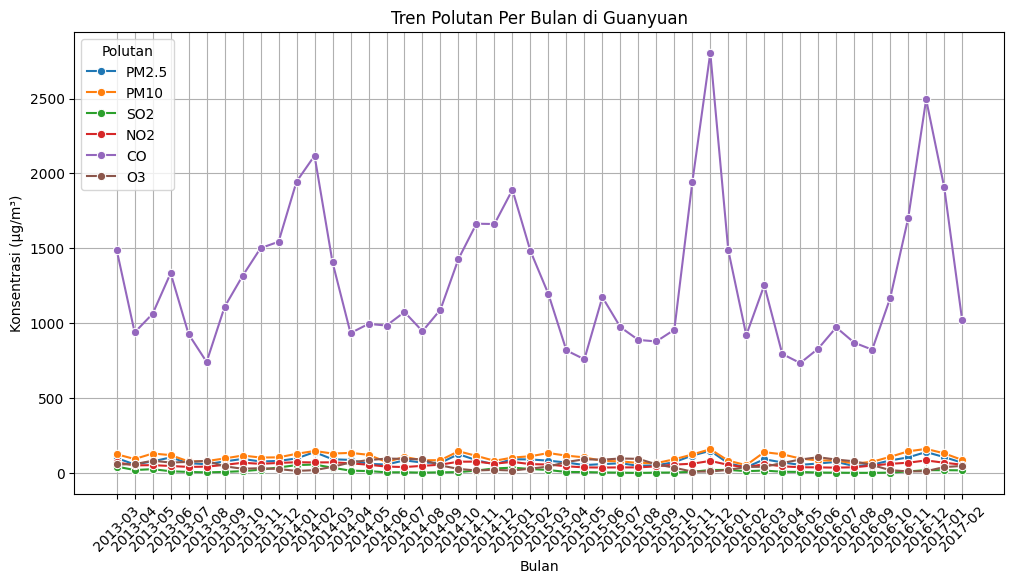

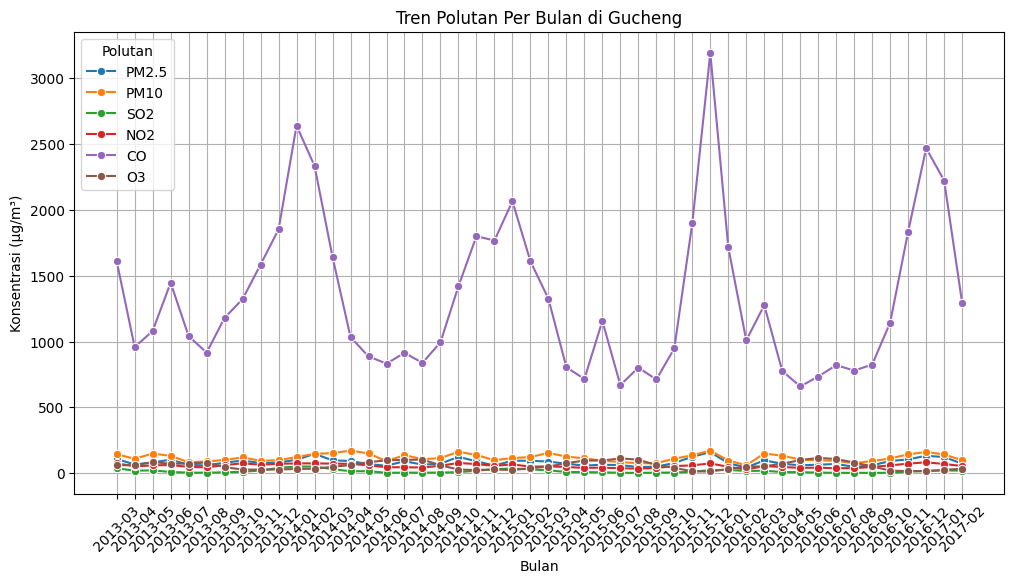

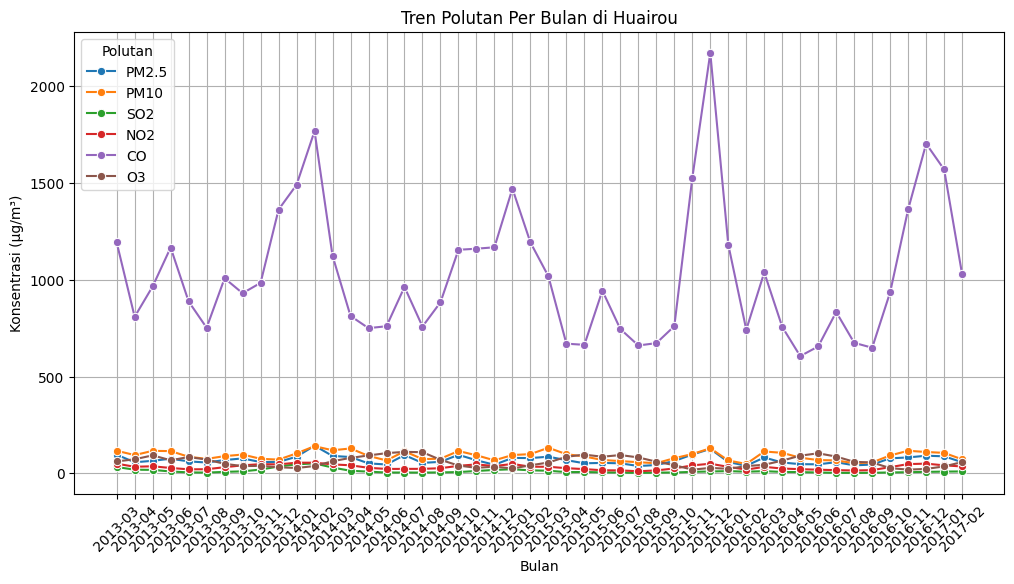

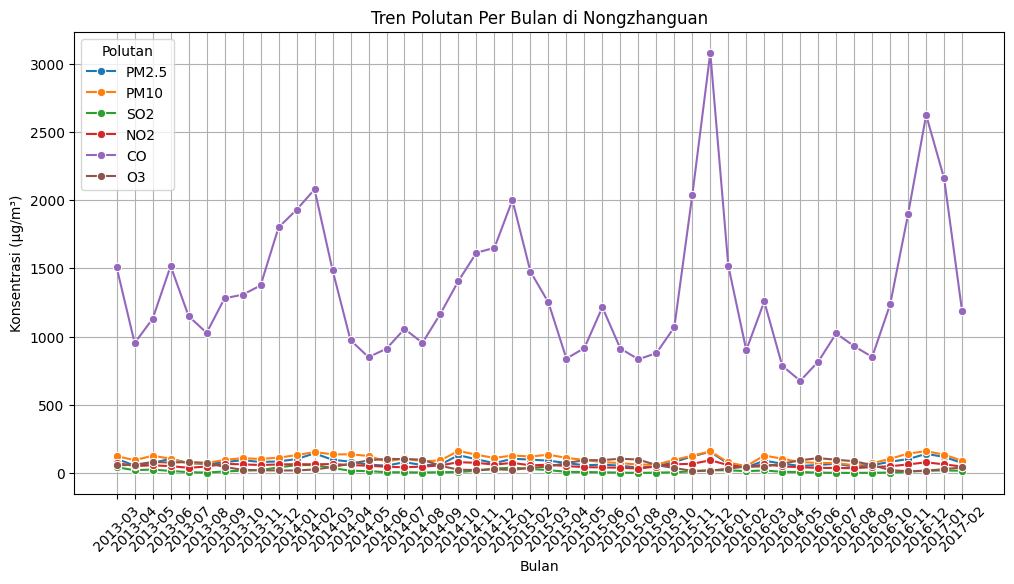

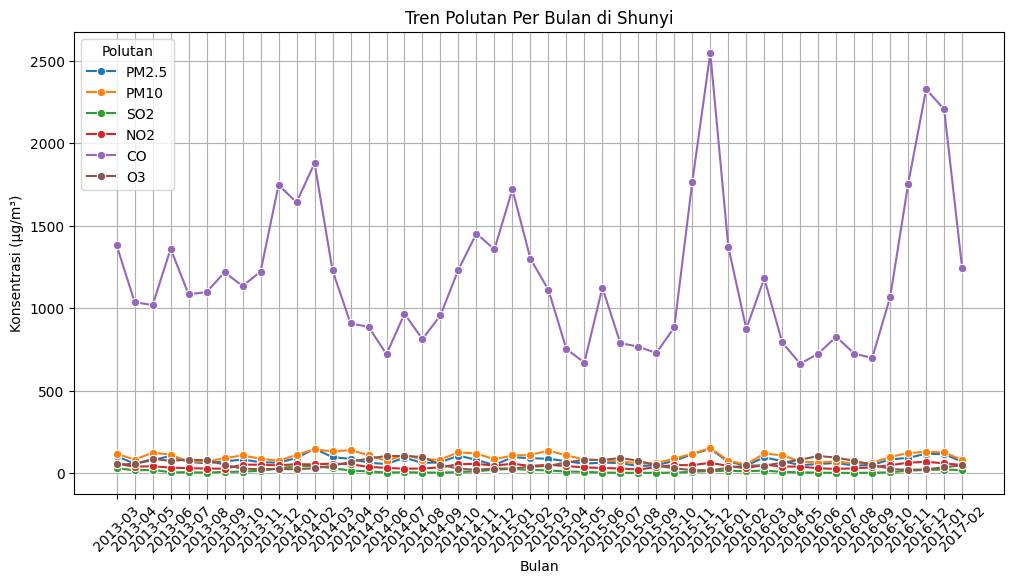

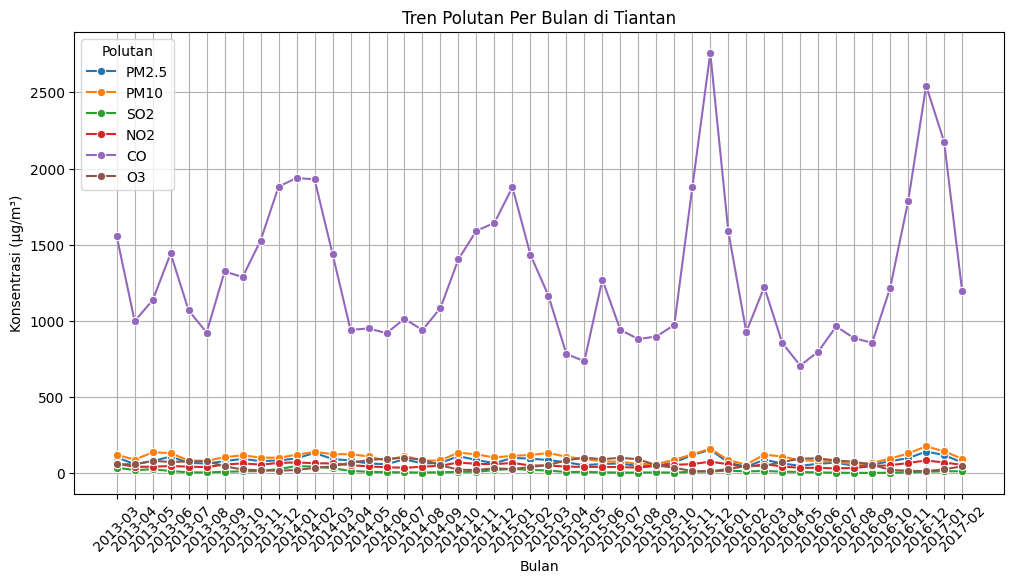

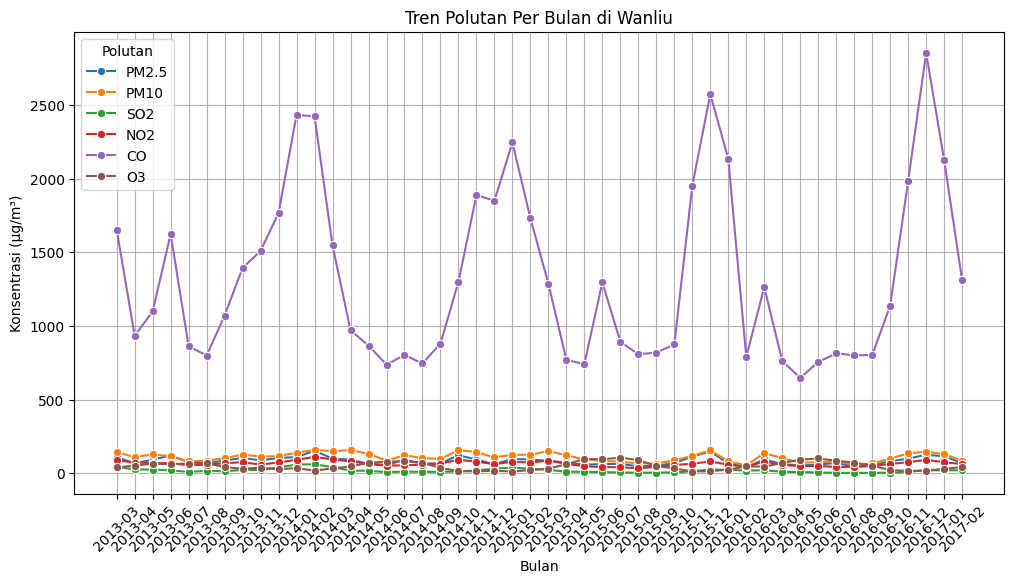

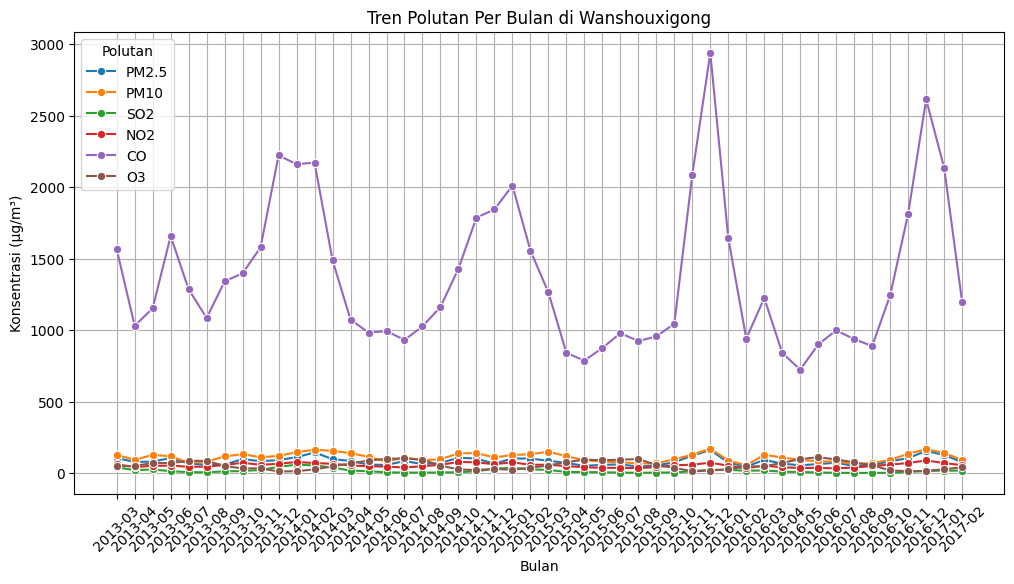

In [12]:
main_data["datetime"] = pd.to_datetime(main_data["datetime"])
main_data["month_year"] = main_data["datetime"].dt.to_period("M").astype(str)
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
stations = main_data["station"].unique()

for station in stations:
    plt.figure(figsize=(12, 6))
    
    station_data = main_data[main_data["station"] == station]

    station_monthly = station_data.groupby("month_year")[pollutants].mean().reset_index()

    for pollutant in pollutants:
        sns.lineplot(data=station_monthly, x="month_year", y=pollutant, label=pollutant, marker="o")
    
    plt.title(f"Tren Polutan Per Bulan di {station}")
    plt.xlabel("Bulan")
    plt.ylabel("Konsentrasi (µg/m³)")
    plt.xticks(rotation=45)
    plt.legend(title="Polutan")
    plt.grid(True)
    
    plt.show()

### Pertanyaan 2: Bagaimana distribusi polusi udara di berbagai lokasi, lalu tempat mana yang memiliki polutan tertinggi?

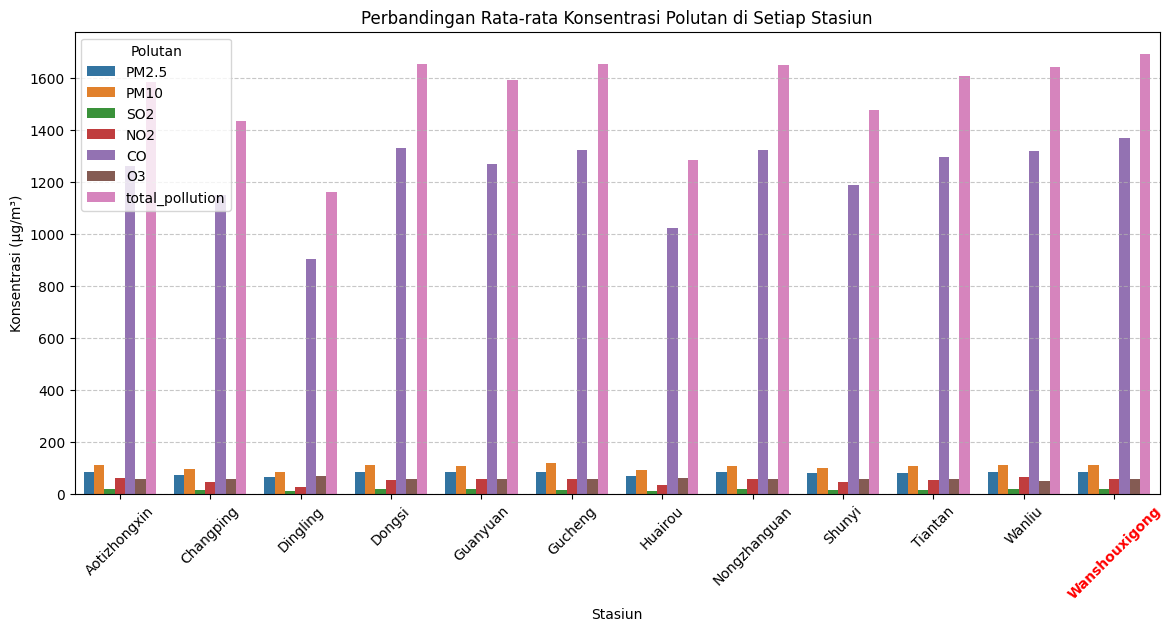

In [13]:
main_data["datetime"] = pd.to_datetime(main_data["datetime"])

pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

station_avg = main_data.groupby("station")[pollutants].mean().reset_index()

station_avg["total_pollution"] = station_avg[pollutants].sum(axis=1)

highest_station = station_avg.loc[station_avg["total_pollution"].idxmax(), "station"]

melted_data = station_avg.melt(id_vars=["station"], var_name="pollutant", value_name="concentration")

plt.figure(figsize=(14, 6))
sns.barplot(data=melted_data, x="station", y="concentration", hue="pollutant", palette="tab10")

plt.title("Perbandingan Rata-rata Konsentrasi Polutan di Setiap Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("Konsentrasi (µg/m³)")
plt.xticks(rotation=45)

xticks = plt.gca().get_xticklabels()
for label in xticks:
    if label.get_text() == highest_station:
        label.set_color("red")
        label.set_fontweight("bold")

plt.legend(title="Polutan")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Pertanyaan 3: Bagaimana Perbedaab Kategori Kualitas Udara per Stasiun Berdasarkan Polutan?

Polutan yang tersedia: PM2.5, PM10, SO2, NO2, CO, O3
Menampilkan visualisasi untuk PM2.5...


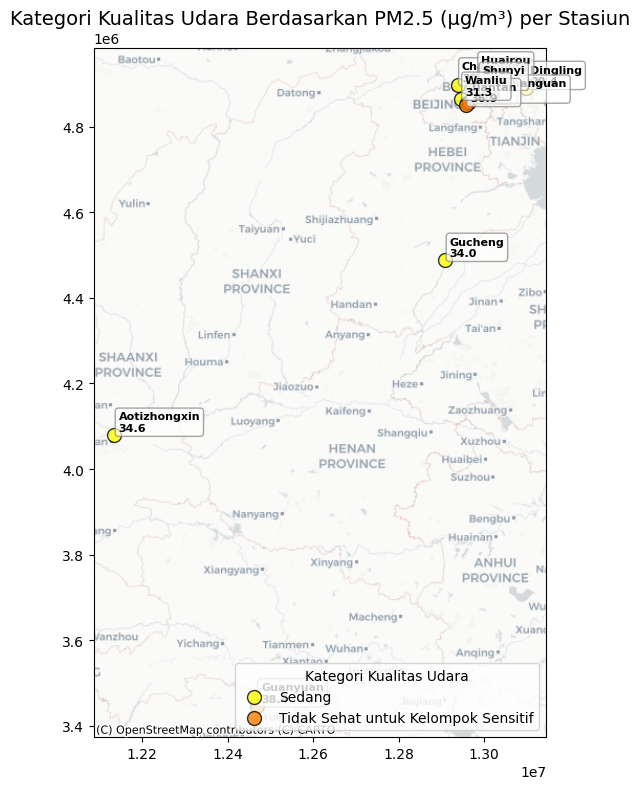

Menampilkan visualisasi untuk PM10...


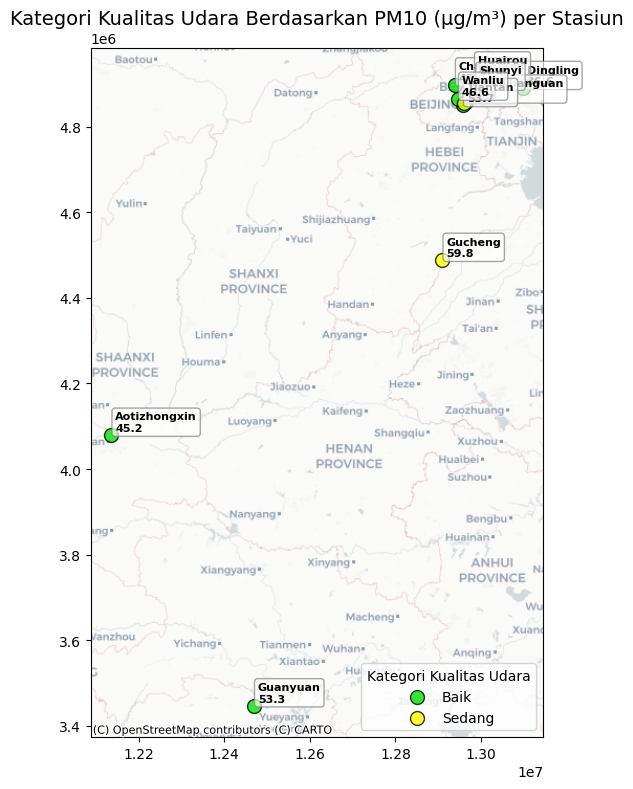

Menampilkan visualisasi untuk SO2...


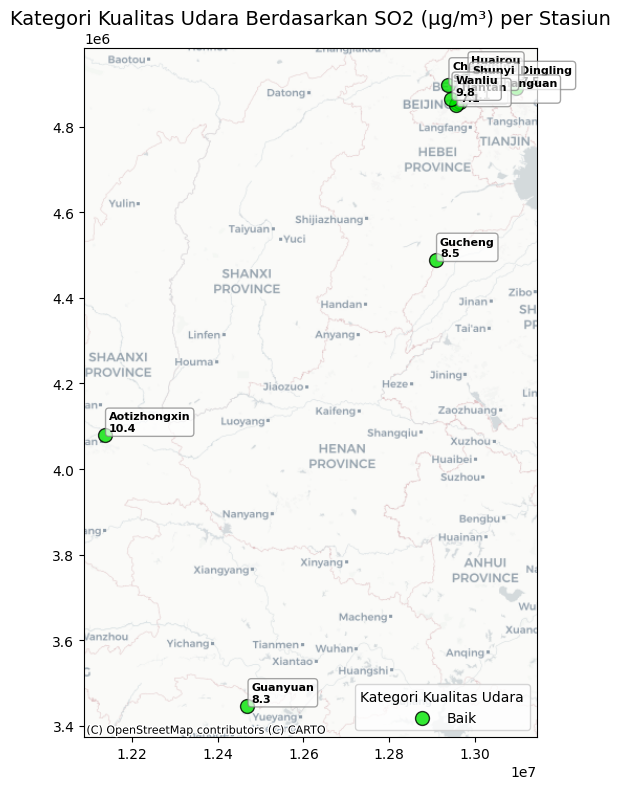

Menampilkan visualisasi untuk NO2...


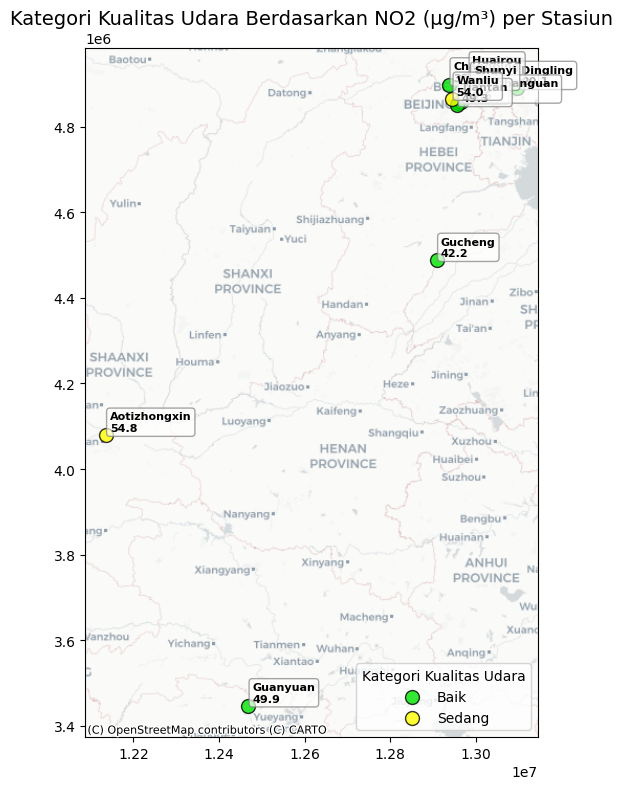

Menampilkan visualisasi untuk CO...


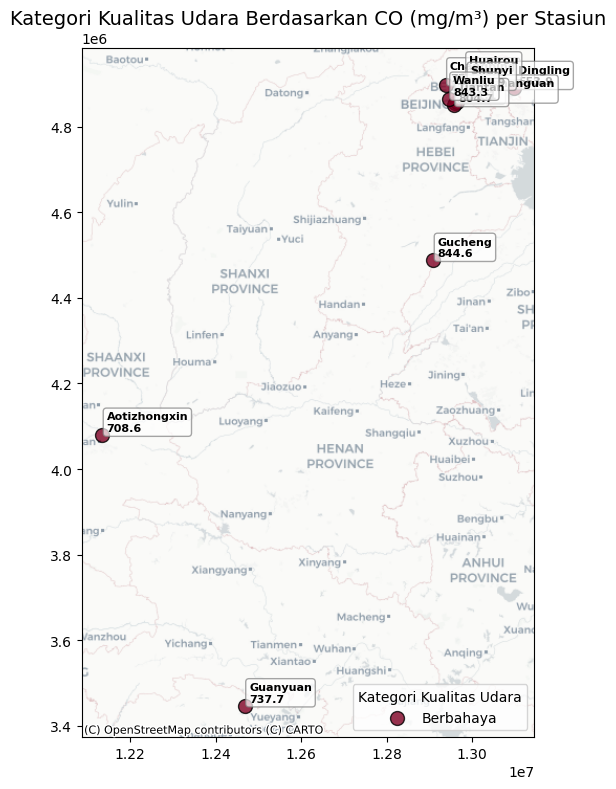

Menampilkan visualisasi untuk O3...


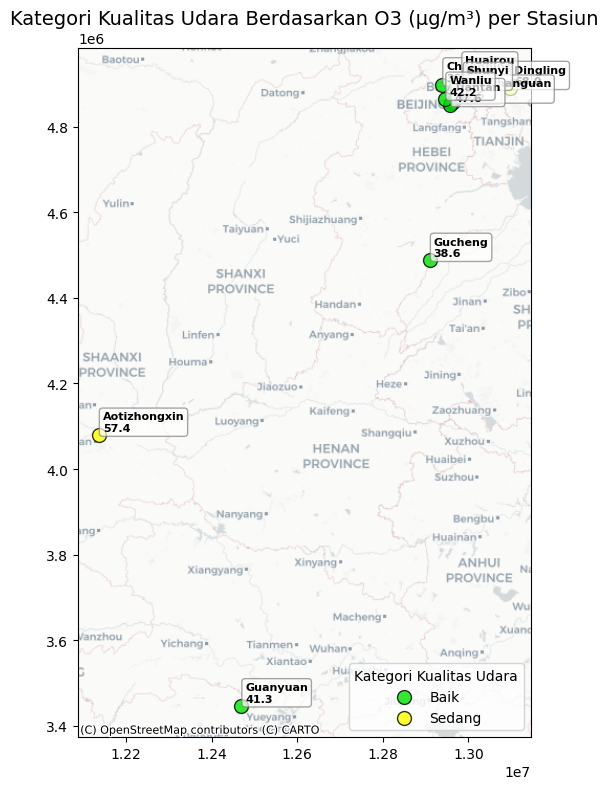

NameError: name 'selected_pollutant' is not defined

In [15]:
geolocator = Nominatim(user_agent="geo_lookup", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, max_retries=5)

cache_file = "dashboard/geocoding_cache.csv"
if os.path.exists(cache_file):
    cache = pd.read_csv(cache_file)
else:
    cache = pd.DataFrame(columns=["station", "latitude", "longitude"])

# Karena memakai geopandas, maka kita membutuhkan longitude dan langitude
def get_coordinates(station_name):
    if station_name in cache["station"].values:
        row = cache[cache["station"] == station_name].iloc[0]
        return row["latitude"], row["longitude"]
    try:
        location = geocode(station_name + ", China")
        if location:
            cache.loc[len(cache)] = [station_name, location.latitude, location.longitude]
            cache.to_csv(cache_file, index=False)
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {station_name}: {e}")
        return None, None

file_path = "dashboard/main_data.csv"
main_data = pd.read_csv(file_path)

stations = main_data["station"].unique()
station_coords = pd.DataFrame(stations, columns=["station"])
station_coords["latitude"], station_coords["longitude"] = zip(*station_coords["station"].apply(get_coordinates))
main_data = main_data.merge(station_coords, on="station", how="left")

main_data["datetime"] = pd.to_datetime(main_data["datetime"])
latest_date = main_data["datetime"].max()
one_week_data = main_data[main_data["datetime"] >= (latest_date - pd.DateOffset(weeks=1))]

one_week_data.loc[:, "longitude"] = pd.to_numeric(one_week_data["longitude"], errors="coerce")
one_week_data.loc[:, "latitude"] = pd.to_numeric(one_week_data["latitude"], errors="coerce")
one_week_data = one_week_data.dropna(subset=["longitude", "latitude"])
one_week_data = one_week_data[
    (one_week_data["longitude"] != float("inf")) & 
    (one_week_data["longitude"] != float("-inf")) &
    (one_week_data["latitude"] != float("inf")) & 
    (one_week_data["latitude"] != float("-inf"))
]

def visualize_pollutant(data, pollutant="PM2.5"):
    aqi_standards = {
        "PM2.5": {
            "Baik": 12.0,
            "Sedang": 35.4,
            "Tidak Sehat untuk Kelompok Sensitif": 55.4,
            "Tidak Sehat": 150.4,
            "Sangat Tidak Sehat": 250.4,
            "Berbahaya": float('inf')
        },
        "PM10": {
            "Baik": 54.0,
            "Sedang": 154.0,
            "Tidak Sehat untuk Kelompok Sensitif": 254.0,
            "Tidak Sehat": 354.0,
            "Sangat Tidak Sehat": 424.0,
            "Berbahaya": float('inf')
        },
        "SO2": {
            "Baik": 35.0,
            "Sedang": 75.0,
            "Tidak Sehat untuk Kelompok Sensitif": 185.0,
            "Tidak Sehat": 304.0,
            "Sangat Tidak Sehat": 604.0,
            "Berbahaya": float('inf')
        },
        "NO2": {
            "Baik": 53.0,
            "Sedang": 100.0,
            "Tidak Sehat untuk Kelompok Sensitif": 360.0,
            "Tidak Sehat": 649.0,
            "Sangat Tidak Sehat": 1249.0,
            "Berbahaya": float('inf')
        },
        "CO": {
            "Baik": 4.4,
            "Sedang": 9.4,
            "Tidak Sehat untuk Kelompok Sensitif": 12.4,
            "Tidak Sehat": 15.4,
            "Sangat Tidak Sehat": 30.4,
            "Berbahaya": float('inf')
        },
        "O3": {
            "Baik": 54.0,
            "Sedang": 70.0,
            "Tidak Sehat untuk Kelompok Sensitif": 85.0,
            "Tidak Sehat": 105.0,
            "Sangat Tidak Sehat": 200.0,
            "Berbahaya": float('inf')
        }
    }
    
    def get_category(value, pollutant_standards):
        for category, threshold in pollutant_standards.items():
            if value <= threshold:
                return category
        return "Data Tidak Tersedia"
    
    if pollutant not in data.columns:
        available_pollutants = [col for col in data.columns if col in aqi_standards.keys()]
        print(f"Polutan {pollutant} tidak ditemukan. Polutan yang tersedia: {', '.join(available_pollutants)}")
        if available_pollutants:
            pollutant = available_pollutants[0]
            print(f"Menggunakan {pollutant} sebagai gantinya.")
        else:
            print("Tidak ada polutan yang tersedia untuk visualisasi.")
            return
            
    station_avg_pollutant = data.groupby("station")[pollutant].mean().reset_index()
    station_avg_pollutant = station_avg_pollutant.merge(station_coords, on="station", how="left")
    gdf_stations = gpd.GeoDataFrame(
        station_avg_pollutant, 
        geometry=gpd.points_from_xy(station_avg_pollutant["longitude"], station_avg_pollutant["latitude"]), 
        crs="EPSG:4326"
    )
    gdf_stations = gdf_stations.to_crs(epsg=3857)
    gdf_stations["kategori_udara"] = gdf_stations[pollutant].apply(
        lambda x: get_category(x, aqi_standards[pollutant])
    )
    
    category_colors = {
        "Baik": "#00e400",
        "Sedang": "#ffff00",
        "Tidak Sehat untuk Kelompok Sensitif": "#ff7e00",
        "Tidak Sehat": "#ff0000",
        "Sangat Tidak Sehat": "#8F3F97",
        "Berbahaya": "#7e0023",
        "Data Tidak Tersedia": "#999999"
    }
    gdf_stations["color"] = gdf_stations["kategori_udara"].map(category_colors)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for category, color in category_colors.items():
        subset = gdf_stations[gdf_stations["kategori_udara"] == category]
        if not subset.empty:
            subset.plot(
                ax=ax,
                color=color,
                markersize=100,
                alpha=0.8,
                edgecolor="black",
                label=category
            )
    
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    for idx, row in gdf_stations.iterrows():
        ax.annotate(
            text=f"{row['station']}\n{row[pollutant]:.1f}",
            xy=(row.geometry.x, row.geometry.y),
            xytext=(3, 3),
            textcoords="offset points",
            fontsize=8,
            color='black',
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
        )
    
    ax.legend(title="Kategori Kualitas Udara", loc="lower right")
    units = {
        "PM2.5": "μg/m³",
        "PM10": "μg/m³",
        "SO2": "μg/m³",
        "NO2": "μg/m³",
        "CO": "mg/m³",
        "O3": "μg/m³"
    }

    unit = units.get(pollutant, "")
    plt.title(f"Kategori Kualitas Udara Berdasarkan {pollutant} ({unit}) per Stasiun", fontsize=14)
    plt.tight_layout()
    plt.show()

available_pollutants = [col for col in one_week_data.columns if col in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]]
print(f"Polutan yang tersedia: {', '.join(available_pollutants)}")

for pollutant in available_pollutants:
    print(f"Menampilkan visualisasi untuk {pollutant}...")
    visualize_pollutant(one_week_data, pollutant)
    plt.pause(2)
visualize_pollutant(one_week_data, selected_pollutant)

### Pertanyaan 4: Bagaimana perbedaan kualitas udara antara pagi, siang, dan malam, dan pada jam berapakah kualitas udara terburuk dan terbaik?

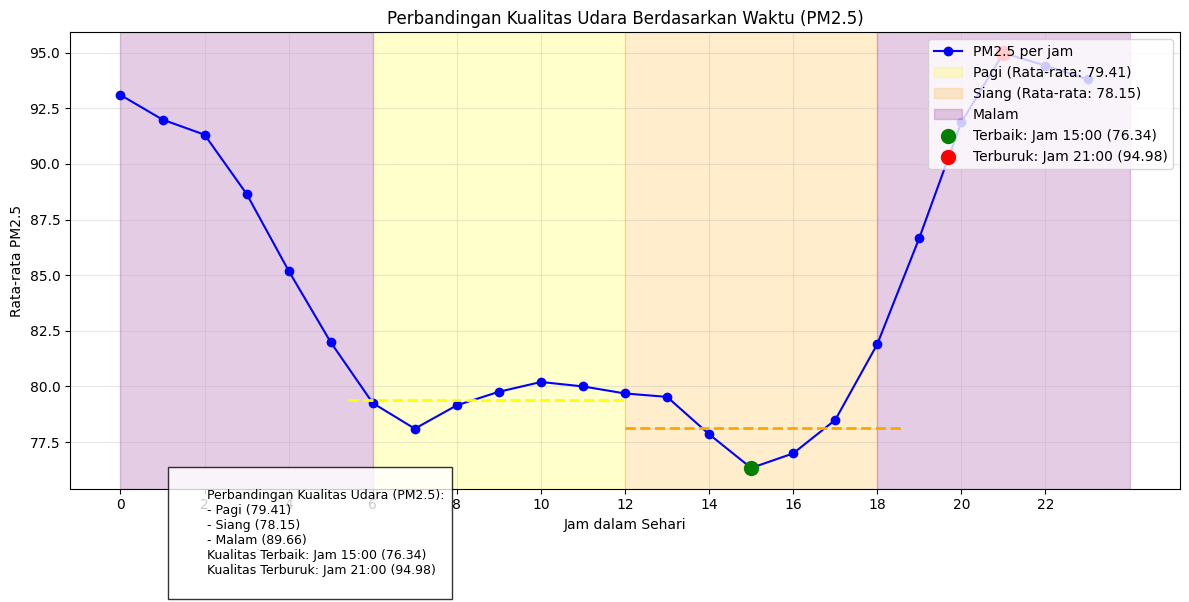

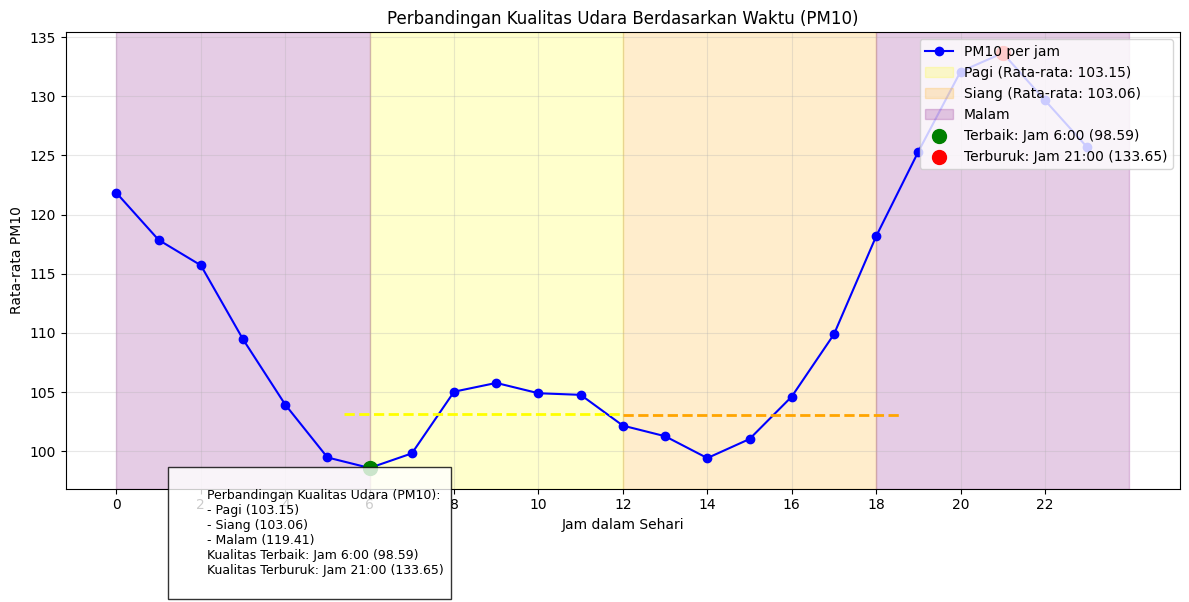

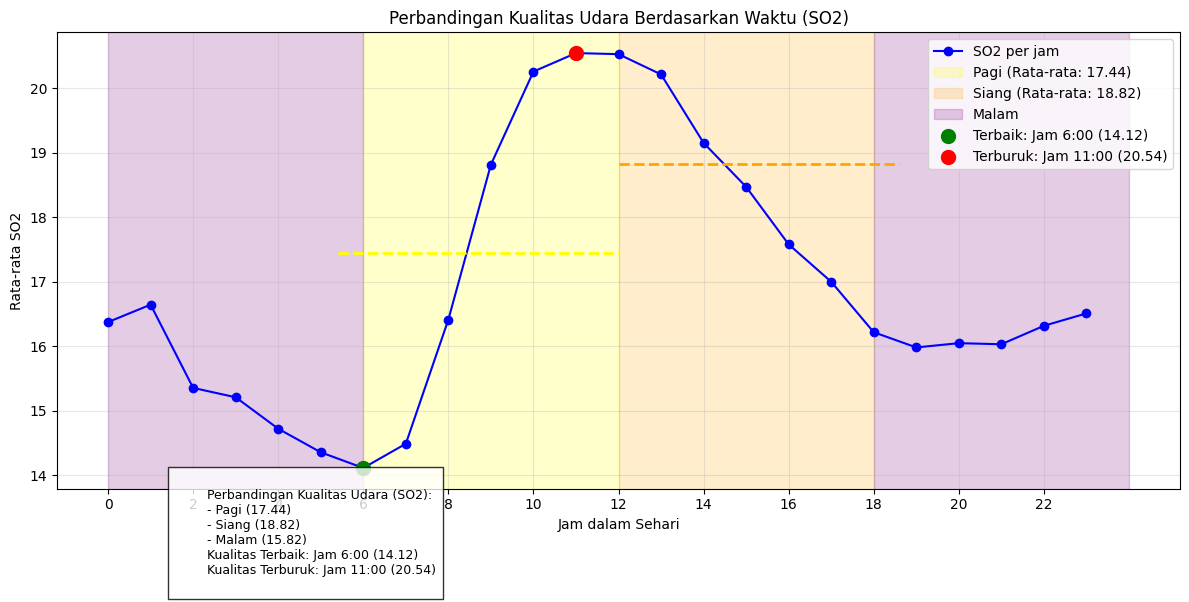

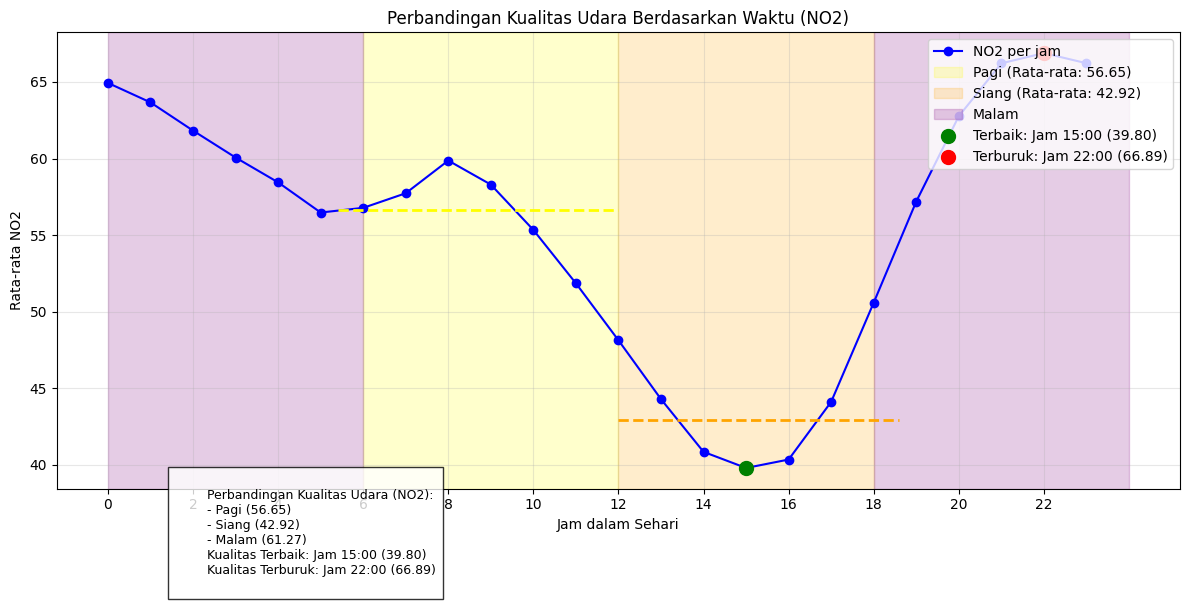

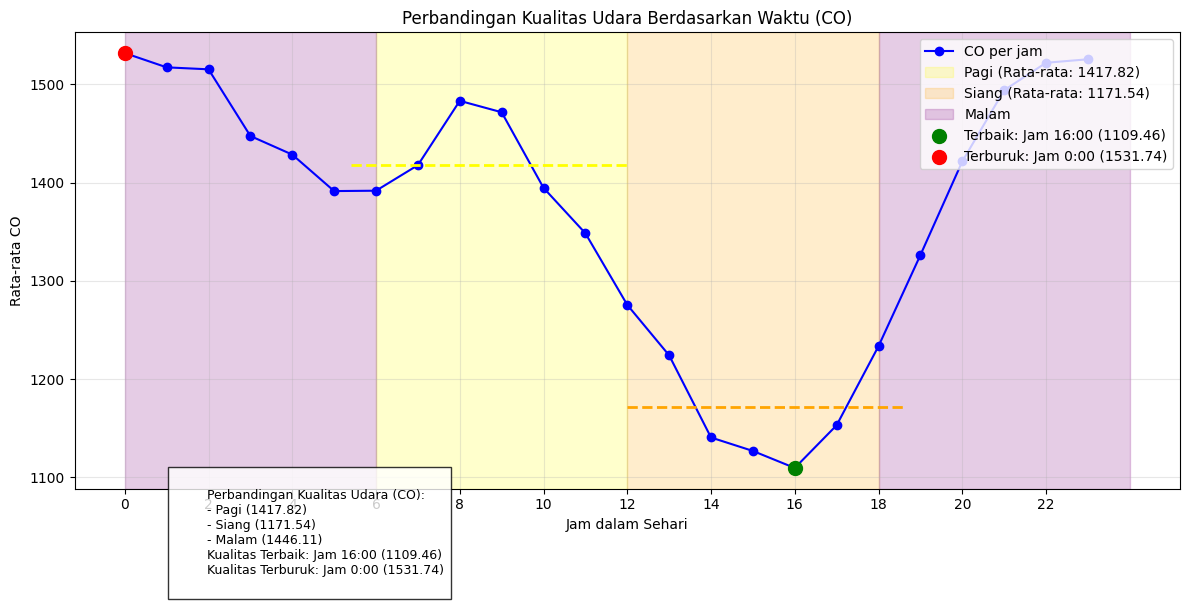

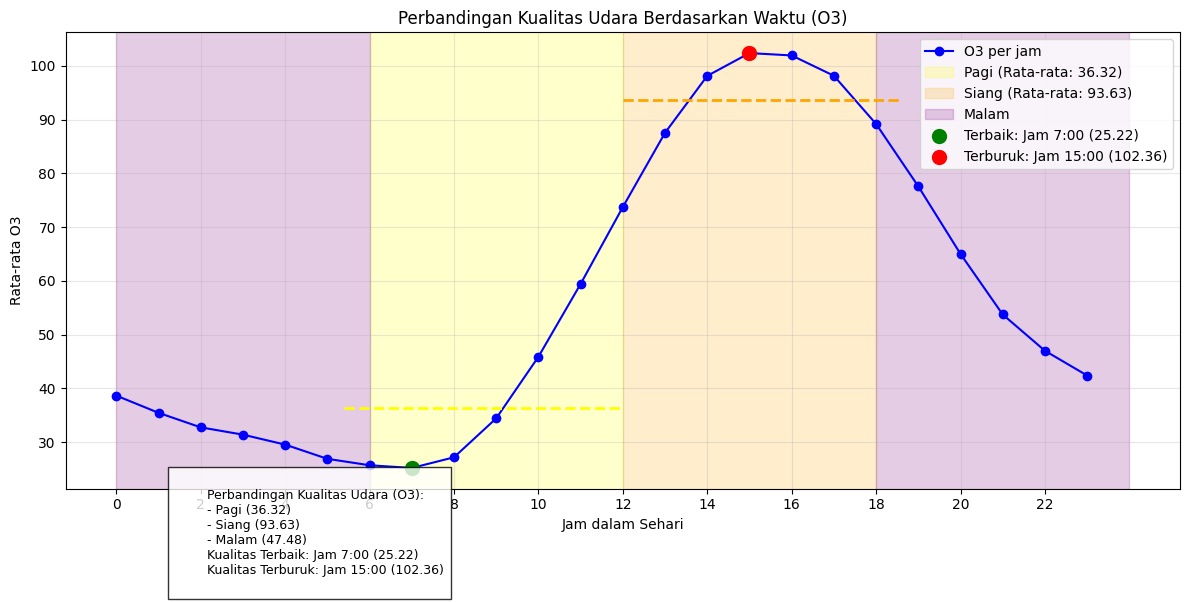

In [16]:
df["Hour"] = df["datetime"].dt.hour
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for pollutant in pollutants:
    if pollutant in df.columns:
        hourly_avg = df.groupby("Hour")[pollutant].mean()
        best_hour = hourly_avg.idxmin()
        worst_hour = hourly_avg.idxmax()
        best_value = hourly_avg.min()
        worst_value = hourly_avg.max()

        morning_avg = hourly_avg[6:12].mean()
        afternoon_avg = hourly_avg[12:18].mean()
        night_avg = pd.concat([hourly_avg[18:24], hourly_avg[0:6]]).mean()
        
        plt.figure(figsize=(12, 6))

        plt.plot(hourly_avg.index, hourly_avg.values, marker="o", linestyle="-", color="blue", label=f"{pollutant} per jam")

        plt.axvspan(6, 12, color="yellow", alpha=0.2, label=f"Pagi (Rata-rata: {morning_avg:.2f})")
        plt.axvspan(12, 18, color="orange", alpha=0.2, label=f"Siang (Rata-rata: {afternoon_avg:.2f})")
        plt.axvspan(18, 24, color="purple", alpha=0.2, label=f"Malam")
        plt.axvspan(0, 6, color="purple", alpha=0.2)

        plt.scatter(best_hour, best_value, color="green", s=100, zorder=5, 
                    label=f"Terbaik: Jam {best_hour}:00 ({best_value:.2f})")
        plt.scatter(worst_hour, worst_value, color="red", s=100, zorder=5, 
                    label=f"Terburuk: Jam {worst_hour}:00 ({worst_value:.2f})")

        plt.axhline(y=morning_avg, xmin=6/24, xmax=12/24, color="yellow", linestyle="--", linewidth=2)
        plt.axhline(y=afternoon_avg, xmin=12/24, xmax=18/24, color="orange", linestyle="--", linewidth=2)

        plt.xlabel("Jam dalam Sehari")
        plt.ylabel(f"Rata-rata {pollutant}")
        plt.title(f"Perbandingan Kualitas Udara Berdasarkan Waktu ({pollutant})")
        plt.xticks(range(0, 24, 2))
        plt.grid(alpha=0.3)
        plt.legend(loc="upper right")

        comparison_text = f"""
        Perbandingan Kualitas Udara ({pollutant}):
        - Pagi ({morning_avg:.2f})
        - Siang ({afternoon_avg:.2f})
        - Malam ({night_avg:.2f})
        Kualitas Terbaik: Jam {best_hour}:00 ({best_value:.2f})
        Kualitas Terburuk: Jam {worst_hour}:00 ({worst_value:.2f})
        """
        plt.figtext(0.15, 0.01, comparison_text, ha="left", fontsize=9, bbox={"facecolor":"white", "alpha":0.8, "pad":5})

        plt.tight_layout(rect=[0, 0.08, 1, 1])
        plt.show()

**Insight:**
- Pola perubahan polutan sepanjang tahun rata-rata memiliki rentang yang kecil, kecuali pada perubahan CO.
- Besarnya polutan CO mendominasi daripada polutan yang lain.
- Station Wanshouxigong memiliki tingkat polusi yang paling tinggi.
- Tingkat polusi PM2.5 berada di rentang sedang kecuali statiun Tiantan yang tidak sehat untuk kelompok sensitif.
- Tingkat polusi PM10 berada di kualitas baik untuk semua station kecuali Tiantan dan Gucheng berada di sedang.
- Tingkat SO2 di semua statiun berada di rentang baik.
- Tingkat polusi NO2 bedara di kualitas baik kecuali untuk Aotizhongxin dan Wanliu yang berada di sedang.
- Tingkat polusi CO di semua station berada pada tingkat bahaya.
- Tingkat polusi O3 di semua station berada pada tingkat baik, kecuali di station Aotizhongxin dan Dingling.
- Rata-rata waktu yang memiliki kualitas udara terbaik ada di pagi dan siang hari, sedangkan untuk waktu terburuk ada di malam hari.

## Analisis Lanjutan (Opsional)

- Analisis lanjutan telah digunakan pada pertanyaan ketiga dengan Geocoding dengan Nominatim (OpenStreetMap) yang menggunakan geopy untuk mendapatkan koordinat latitude dan longitude dari stasiun pengukuran polusi udara. Hasil dari geocoding disimpan dalam file cache (dashboard/geocoding_cache.csv) agar tidak perlu melakukan request ulang ke server setiap kali kode dijalankan.

## Conclusion

1. Conclution pertanyaan 1
- Pola perubahan polutan sepanjang tahun rata-rata memiliki rentang yang kecil, kecuali pada perubahan CO.
- Besarnya polutan CO mendominasi daripada polutan yang lain.
2. Conclution pertanyaan 2
- Station Wanshouxigong memiliki tingkat polusi yang paling tinggi.
3. Conclution pertanyaan 3
- Tingkat polusi PM2.5 berada di rentang sedang kecuali statiun Tiantan yang tidak sehat untuk kelompok sensitif.
- Tingkat polusi PM10 berada di kualitas baik untuk semua station kecuali Tiantan dan Gucheng berada di sedang.
- Tingkat SO2 di semua statiun berada di rentang baik.
- Tingkat polusi NO2 bedara di kualitas baik kecuali untuk Aotizhongxin dan Wanliu yang berada di sedang.
- Tingkat polusi CO di semua station berada pada tingkat bahaya.
- Tingkat polusi O3 di semua station berada pada tingkat baik, kecuali di station Aotizhongxin dan Dingling.
4. Conclution pertanyaan 4
- Rata-rata waktu yang memiliki kualitas udara terbaik ada di pagi dan siang hari, sedangkan untuk waktu terburuk ada di malam hari.